# Introduction to Deep Learning with PyTorch

## Chapter 1 - Introduction to PyTorch, a Deep Learning Library

### Section 1.1 - Introduction to deep learning with PyTorch

#### Getting started with PyTorch tensors
Tensors are PyTorch's core data structure and the foundation of deep learning. They're similar to NumPy arrays but have unique features.

Here you have a Python list named temperatures containing daily readings from two weather stations. Try converting this into a tensor!

In [2]:
# Import PyTorch
import torch

temperatures = [[72, 75, 78], [70, 73, 76]]

# Create a tensor from temperatures
temp_tensor = torch.tensor(temperatures)

print(temp_tensor)

tensor([[72, 75, 78],
        [70, 73, 76]])


#### Checking and adding tensors

While collecting temperature data, you notice the readings are off by two degrees. Add two degrees to the `temperatures` tensor after verifying its shape and data type with `torch` to ensure compatibility with the adjustment tensor.

The torch library and the temperatures tensor are loaded for you.

In [5]:
adjustment = torch.tensor([[2, 2, 2], [2, 2, 2]])

# Display the shape of the adjustment tensor
print("Adjustment shape:", adjustment.shape)

# Display the type of the adjustment tensor
print("Adjustment type:", adjustment.dtype)

print("Temperatures shape:", temp_tensor.shape)
print("Temperatures type:", temp_tensor.dtype)

Adjustment shape: torch.Size([2, 3])
Adjustment type: torch.int64
Temperatures shape: torch.Size([2, 3])
Temperatures type: torch.int64


In [6]:
adjustment = torch.tensor([[2, 2, 2], [2, 2, 2]])

# Add the temperatures and adjustment tensors
corrected_temperatures = temp_tensor + adjustment
print("Corrected temperatures:", corrected_temperatures)

Corrected temperatures: tensor([[74, 77, 80],
        [72, 75, 78]])


### Section 1.2 - Neural networks and layers

#### Linear layer network

Neural networks often contain many layers, but most of them are linear layers. Understanding a single linear layer helps you grasp how they work before adding complexity.

Apply a linear layer to an input tensor and observe the output.

In [8]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])

# Create a Linear layer
linear_layer = nn.Linear(
                         in_features=3, 
                         out_features=2
                         )

# Pass input_tensor through the linear layer
output = linear_layer(input_tensor)

print(output)

tensor([[-0.5795,  0.3002]], grad_fn=<AddmmBackward0>)


### Section 1.3 - Hidden layers and parameters

#### Your first neural network

It's time for you to implement a small neural network containing two linear layers in sequence.

In [9]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]])

# Create a container for stacking linear layers
model = nn.Sequential(nn.Linear(8, 4),
                nn.Linear(4, 1)
                )

output = model(input_tensor)
print(output)

tensor([[1.7470]], grad_fn=<AddmmBackward0>)


#### Counting the number of parameters

Deep learning models are famous for having a lot of parameters. With more parameters comes more computational complexity and longer training times, and a deep learning practitioner must know how many parameters their model has.

In this exercise, you'll first calculate the number of parameters manually. Then, you'll verify your result using the .numel() method.

In [16]:
model = nn.Sequential(nn.Linear(9, 4),
                      nn.Linear(4, 2),
                      nn.Linear(2, 1))

total = 0

# Calculate the number of parameters in the model
for params in model.parameters():
    #print(params)
    total += params.numel()
  
print(f"The number of parameters in the model is {total}")

The number of parameters in the model is 53


## Chapter 2 - Neural Network Architecture and Hyperparameters

### Section 2.1 - discovering activation function

#### The sigmoid and softmax functions

The sigmoid and softmax functions are key activation functions in deep learning, often used as the final step in a neural network.

Sigmoid is for binary classification
Softmax is for multi-class classification
Given a pre-activation output tensor from a network, apply the appropriate activation function to obtain the final output.

torch.nn has already been imported as nn.

In [17]:
input_tensor = torch.tensor([[2.4]])

# Create a sigmoid function and apply it on input_tensor
sigmoid = nn.Sigmoid()
probability = sigmoid(input_tensor)
print(probability)

tensor([[0.9168]])


In [21]:
input_tensor = torch.tensor([[1.0, -6.0, 2.5, -0.3, 1.2, 0.8]])

# Create a softmax function and apply it on input_tensor
softmax = nn.Softmax(dim=1)
probabilities = softmax(input_tensor)
print(probabilities)

tensor([[1.2828e-01, 1.1698e-04, 5.7492e-01, 3.4961e-02, 1.5669e-01, 1.0503e-01]])


### Section 2.2 - running a forward pass

#### Building a binary classifier in PyTorch

Recall that a small neural network with a single linear layer followed by a sigmoid function is a binary classifier. It acts just like a logistic regression.

Practice building this small network and interpreting the output of the classifier.

In [23]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Implement a small neural network for binary classification
model = nn.Sequential(
  nn.Linear(8,1),
  nn.Sigmoid()
)

output = model(input_tensor)
print(output)

tensor([[0.0035]], grad_fn=<SigmoidBackward0>)


#### From regression to multi-class classification

The models you have seen for binary classification, multi-class classification and regression have all been similar, barring a few tweaks to the model.

Start building a model for regression, and then tweak the model to perform a multi-class classification.

In [27]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])

# Update network below to perform a multi-class classification with four labels
model = nn.Sequential(
  nn.Linear(11, 20),
  nn.Linear(20, 12),
  nn.Linear(12, 6),
  nn.Linear(6, 4),
  nn.Softmax(dim=1)
)

output = model(input_tensor)
print(output)

tensor([[0.3857, 0.2766, 0.2157, 0.1219]], grad_fn=<SoftmaxBackward0>)


### Section 2.3 - Using loss functions to assess model predictions

#### Creating one-hot encoded labels
One-hot encoding converts a single integer label into a vector with N elements, where N is the number of classes. This vector contains zeros and a one at the correct position.

In this exercise, you'll manually create a one-hot encoded vector for y, and then use PyTorch to simplify the process. Your dataset has three classes (0, 1, 2).

`numpy (np)`, `torch.nn.functional (F)`, and `torch` are already imported for you.

In [30]:
import torch.nn.functional as F
import numpy as np

y = 1
num_classes = 3

# Create the one-hot encoded vector using NumPy
one_hot_numpy = np.array([0, 1, 0])

# Create the one-hot encoded vector using PyTorch
one_hot_pytorch = F.one_hot(torch.tensor(y), num_classes=3)

print("One-hot vector using NumPy:", one_hot_numpy)
print("One-hot vector using PyTorch:", one_hot_pytorch)

One-hot vector using NumPy: [0 1 0]
One-hot vector using PyTorch: tensor([0, 1, 0])


#### Calculating cross entropy loss

Cross-entropy loss is a widely used method to measure classification loss. In this exercise, you’ll calculate cross-entropy loss in PyTorch using:

- `y`: the ground truth label.
- `scores`: a vector of predictions before softmax.

Loss functions help neural networks learn by measuring prediction errors. Create a one-hot encoded vector for y, define the cross-entropy loss function, and compute the loss using scores and the encoded label. The result will be a single float representing the sample's loss.

`torch`, `CrossEntropyLoss`, and `torch.nn.functional` as `F` have already been imported for you.

In [31]:
import torch
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss

y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), num_classes=4)

# Create the cross entropy loss function
criterion = CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(loss)

tensor(8.0619, dtype=torch.float64)


### Section 2.4 - Using derivatives to update model parameters

#### Accessing the model parameters

A PyTorch model created with the `nn.Sequential()` is a module that contains the different layers of your network. Recall that each layer parameter can be accessed by indexing the created model directly. In this exercise, you will practice accessing the parameters of different linear layers of a neural network.

In [32]:
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Linear(8, 2)
                     )

# Access the weight of the first linear layer
weight_0 = model[0].weight
print("Weight of the first layer:", weight_0)

# Access the bias of the second linear layer
bias_1 = model[1].bias
print("Bias of the second layer:", bias_1)

Weight of the first layer: Parameter containing:
tensor([[ 0.1617,  0.0397,  0.1497,  0.1700,  0.2119, -0.2094, -0.1081,  0.0210,
         -0.1026, -0.0270, -0.1196,  0.2085,  0.1260,  0.1189,  0.2382, -0.1286],
        [ 0.2177, -0.0268,  0.1033,  0.1875,  0.0241, -0.0741,  0.0349,  0.2313,
          0.0304, -0.0983,  0.0252, -0.1887,  0.0382,  0.1333,  0.0295, -0.0638],
        [-0.0875, -0.0446,  0.0326,  0.2142, -0.1323, -0.1868,  0.1845,  0.0855,
          0.2117, -0.2131, -0.1945,  0.0839, -0.0864,  0.1829, -0.0882,  0.0728],
        [-0.0076,  0.1848, -0.1924, -0.1329,  0.2388, -0.1941, -0.0439, -0.1929,
          0.1133, -0.0860, -0.0498, -0.2002,  0.2145,  0.0910, -0.0765, -0.0572],
        [-0.0004, -0.2412, -0.0775,  0.1716, -0.1473, -0.0396, -0.1608, -0.2016,
         -0.1252,  0.0864, -0.0735,  0.0526, -0.2240,  0.0455, -0.0840,  0.2091],
        [ 0.2143,  0.1801,  0.1207, -0.1909,  0.1965,  0.2219,  0.2411,  0.2268,
         -0.0122, -0.0631, -0.1668, -0.1393, -0.0550,  

#### Updating the weights manually

Now that you know how to access weights and biases, you will manually perform the job of the PyTorch optimizer. While PyTorch automates this, practicing it manually helps you build intuition for how models learn and adjust. This understanding will be valuable when debugging or fine-tuning neural networks.

A neural network of three layers has been created and stored as the model variable. This network has been used for a forward pass and the loss and its derivatives have been calculated. A default learning rate, lr, has been chosen to scale the gradients when performing the update.

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Input
input_tensor = torch.randn((1, 16))
y = torch.tensor([0])

# Model
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)

# Forward pass
output = model(input_tensor)

# Loss
criterion = nn.CrossEntropyLoss()
loss = criterion(output, y)

# Backward pass
loss.backward()

# Learning rate
lr = 0.001

# Manual weight update (no torch.no_grad, using .data)
weight0 = model[0].weight
weight1 = model[1].weight
weight2 = model[2].weight

weight0.data -= lr * weight0.grad
weight1.data -= lr * weight1.grad
weight2.data -= lr * weight2.grad
print(weight2.data)

# Don't forget to zero the gradients
model.zero_grad()

tensor([[-0.3071,  0.0870,  0.1546,  0.2295],
        [-0.3298,  0.3811,  0.4934,  0.0941]])


#### Using the PyTorch optimizer

Earlier, you manually updated the weight of a network, gaining insight into how training works behind the scenes. However, this method isn’t scalable for deep networks with many layers.

Thankfully, PyTorch provides the SGD optimizer, which automates this process efficiently in just a few lines of code. Now, you’ll complete the training loop by updating the weights using a PyTorch optimizer.

A neural network has been created and provided as the model variable. This `model` was used to run a forward pass and create the tensor of predictions `pred`. The one-hot encoded tensor is named `target` and the cross entropy loss function is stored as `criterion`.

`torch.optim` as `optim`, and `torch.nn` as `nn` have already been loaded for you.

## Chapter 3 - Training a Neural Network with PyTorch

### Section 3.1 - A deeper dive into loading data

#### Using TensorDataset

Structuring your data into a dataset is one of the first steps in training a PyTorch neural network. `TensorDataset` simplifies this by converting NumPy arrays into a format PyTorch can use.

In this exercise, you'll create a `TensorDataset` using the preloaded `animals` dataset and inspect its structure.

In [81]:
import pandas as pd

data = [['sparrow', 0, 1, 1, 0, 0, 2, 1, 0],
       ['eagle', 0, 1, 1, 0, 1, 2, 1, 0],
       ['cat', 1, 0, 0, 1, 1, 4, 1, 1],
       ['dog', 1, 0, 0, 1, 0, 4, 1, 1],
       ['lizard', 0, 0, 1, 0, 1, 4, 1, 2]]

columns =['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'predator', 'legs', 'tail', 'type']
animals = pd.DataFrame(data=data, columns=columns)

In [82]:
import torch
from torch.utils.data import TensorDataset

X = animals.iloc[:, 1:-1].to_numpy()  
y = animals.iloc[:, -1].to_numpy()

# Create a dataset
dataset = TensorDataset(torch.tensor(X), torch.tensor(y))

# Print the first sample
input_sample, label_sample = dataset[0]
print('Input sample:', input_sample)
print('Label sample:', label_sample)

Input sample: tensor([0, 1, 1, 0, 0, 2, 1])
Label sample: tensor(0)


#### Using DataLoader

The `DataLoader` class is essential for efficiently handling large datasets. It speeds up training, optimizes memory usage, and stabilizes gradient updates, making deep learning models more effective.

Now, you'll create a PyTorch `DataLoader` using the `dataset` from the previous exercise and see it in action.

In [83]:
from torch.utils.data import DataLoader

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate over the dataloader
for batch_inputs, batch_labels in dataloader:
    print('batch_inputs:', batch_inputs)
    print('batch_labels:', batch_labels)

batch_inputs: tensor([[0, 1, 1, 0, 0, 2, 1],
        [1, 0, 0, 1, 1, 4, 1]])
batch_labels: tensor([0, 1])
batch_inputs: tensor([[1, 0, 0, 1, 0, 4, 1],
        [0, 0, 1, 0, 1, 4, 1]])
batch_labels: tensor([1, 2])
batch_inputs: tensor([[0, 1, 1, 0, 1, 2, 1]])
batch_labels: tensor([0])


### Section 3.2 - Writing our first training loop

#### Using the MSELoss

For regression problems, you often use Mean Squared Error (MSE) as a loss function instead of cross-entropy. MSE calculates the squared difference between predicted values (`y_pred`) and actual values (`y`). Now, you'll compute MSE loss using both NumPy and PyTorch.

`torch`, `numpy` (as `np`), and `torch.nn` (as `nn`) packages are already imported.

In [84]:
y_pred = np.array([3, 5.0, 2.5, 7.0])  
y = np.array([3.0, 4.5, 2.0, 8.0])     

# Calculate MSE using NumPy
mse_numpy = np.mean((y-y_pred)**2)

# Create the MSELoss function in PyTorch
criterion = nn.MSELoss()

# Calculate MSE using PyTorch
mse_pytorch = criterion(torch.tensor(y_pred),torch.tensor(y))

print("MSE (NumPy):", mse_numpy)
print("MSE (PyTorch):", mse_pytorch)

MSE (NumPy): 0.375
MSE (PyTorch): tensor(0.3750, dtype=torch.float64)


#### Writing a training loop

In `scikit-learn`, the training loop is wrapped in the `.fit()` method, while in PyTorch, it's set up manually. While this adds flexibility, it requires a custom implementation.

In this exercise, you'll create a loop to train a model for salary prediction.

The `show_results()` function is provided to help you visualize some sample predictions.

The package imports provided are: `pandas` as `pd`, `torch`, `torch.nn` as `nn`, `torch.optim` as `optim`, as well as `DataLoader` and `TensorDataset` from `torch.utils.data`.

The following variables have been created: num_epochs, containing the number of epochs (set to 5); dataloader, containing the dataloader; model, containing the neural network; criterion, containing the loss function, nn.MSELoss(); optimizer, containing the SGD optimizer.

In [89]:
model = nn.Sequential(
    nn.Linear(4, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1))

In [88]:
num_epochs = 5

In [103]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

X = animals.iloc[:, 1:-1].to_numpy()  
y = animals.iloc[:, -1].to_numpy()

# Create a dataset
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

criterion = nn.MSELoss()
optimier = optim.SGD(model.parameters(), lr=0.001)

In [104]:
model = nn.Sequential(
    nn.Linear(7, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1))

In [105]:
# Loop over the number of epochs and the dataloader
for i in range(num_epochs):
  for data in dataloader:
    # Set the gradients to zero
    optimizer.zero_grad()
    # Run a forward pass
    feature, target = data
    prediction = model(feature)    
    # Compute the loss
    loss = criterion(prediction, target)    
    # Compute the gradients
    loss.backward()
    # Update the model's parameters
    optimizer.step()
#show_results(model, dataloader)

/home/sacha/.cache/pypoetry/virtualenvs/datacamp-ml-M1zkPQRL-py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/sacha/.cache/pypoetry/virtualenvs/datacamp-ml-M1zkPQRL-py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### Section 3.3 - ReLU activation function

#### Implementing ReLU

The Rectified Linear Unit (ReLU) is a widely-used activation function in deep learning, solving challenges like the vanishing gradients problem.

In this exercise, you'll implement ReLU in PyTorch, apply it to both positive and negative values, and observe the results.

`torch.nn` package has already been imported for you as `nn`.

In [106]:
# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

x_pos = torch.tensor(2.0)
x_neg = torch.tensor(-3.0)

# Apply the ReLU function to the tensors
output_pos = relu_pytorch(x_pos)
output_neg = relu_pytorch(x_neg)

print("ReLU applied to positive value:", output_pos)
print("ReLU applied to negative value:", output_neg)

ReLU applied to positive value: tensor(2.)
ReLU applied to negative value: tensor(0.)


#### Implementing leaky ReLU
While ReLU is widely used, it sets negative inputs to 0, resulting in null gradients for those values. This can prevent parts of the model from learning.

Leaky ReLU overcomes this by allowing small gradients for negative inputs, controlled by the negative_slope parameter. Instead of 0, negative inputs are scaled by this small value, keeping the model's learning active.

In this exercise, you will implement the leaky ReLU function in PyTorch and practice using it. torch package as well as the torch.nn as nn have already been imported.

In [107]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


### Section 3.4 - Learning rate and momentum

#### Experimenting with learning rate

In this exercise, your goal is to find the optimal learning rate such that the optimizer can find the minimum of the non-convex function 
 in ten steps.

You will experiment with three different learning rate values. For this problem, try learning rate values between 0.001 to 0.1.

You are provided with the optimize_and_plot() function that takes the learning rate for the first argument. This function will run 10 steps of the SGD optimizer and display the results.

In [116]:
import matplotlib.pyplot as plt

def function(x):
    return x**4 + x**3 - 5*x**2


def optimize_and_plot(lr=0.01, momentum=0.0):
    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []
    for i in range(10):
        y = function(x)
        values.append((x.clone(), y.clone()))
        y.backward()

        d_p = x.grad.data
        if momentum != 0:
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer

        x.data.add_(d_p, alpha=-lr)
        x.grad.zero_()

    # Prepare numpy arrays for plotting the function curve
    x_np = np.arange(-3, 2, 0.001)
    # Evaluate function on numpy array -- convert to torch tensor, detach later
    y_np = function(torch.tensor(x_np)).detach().numpy()

    plt.figure(figsize=(10, 5))
    plt.plot([v[0].detach().numpy() for v in values], 
             [v[1].detach().numpy() for v in values], 'r-X', linewidth=2, markersize=7)
    
    for i in range(10):
        plt.text(values[i][0].item() + 0.1, values[i][1].item(), f'step {i}', fontdict={'color': 'r'})

    plt.plot(x_np, y_np, linewidth=2)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(['Optimizer steps', 'Square function'])
    plt.show()

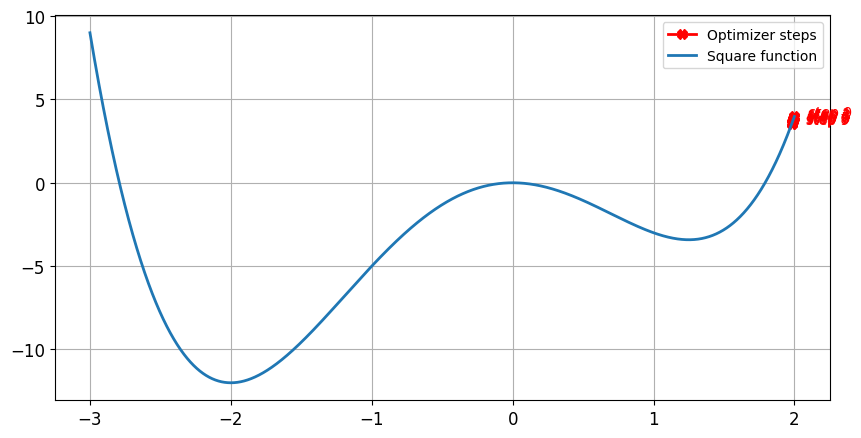

In [122]:
lr0 = 0.0001
optimize_and_plot(lr=lr0)

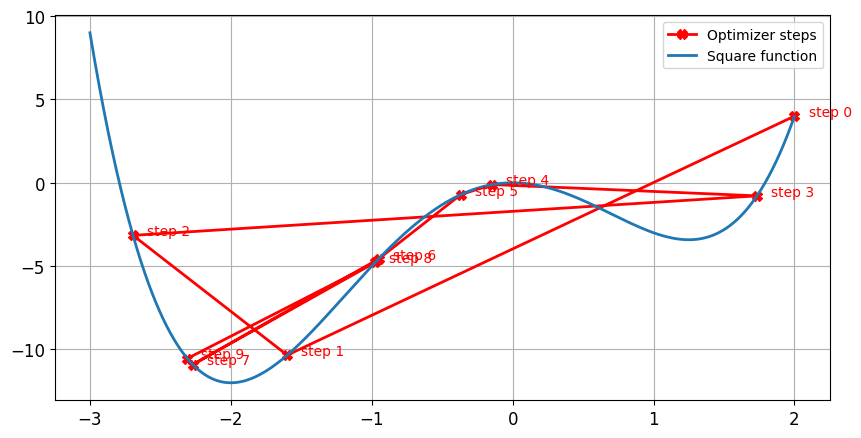

In [129]:
# Try a second learning rate value
lr1 = 0.15
optimize_and_plot(lr=lr1)

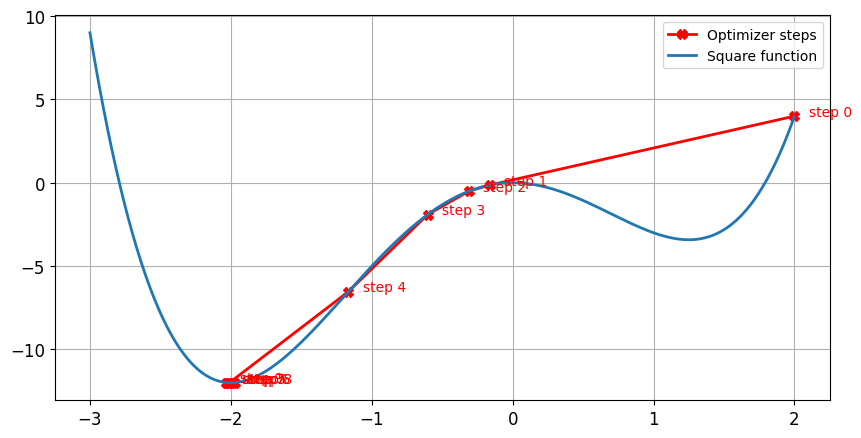

In [130]:
# Try a third learning rate value
lr2 = 0.09
optimize_and_plot(lr=lr2)

#### Experimenting with momentum
In this exercise, your goal is to find the optimal momentum such that the optimizer can find the minimum of the following non-convex function 
$x^4 + x^3 - 5x^2$ in 20 steps. You will experiment with two different momentum values. For this problem, the learning rate is fixed at 0.01.

You are provided with the optimize_and_plot() function that accepts as input the momentum parameter. This function will run 20 steps of the SGD optimizer and display the results.

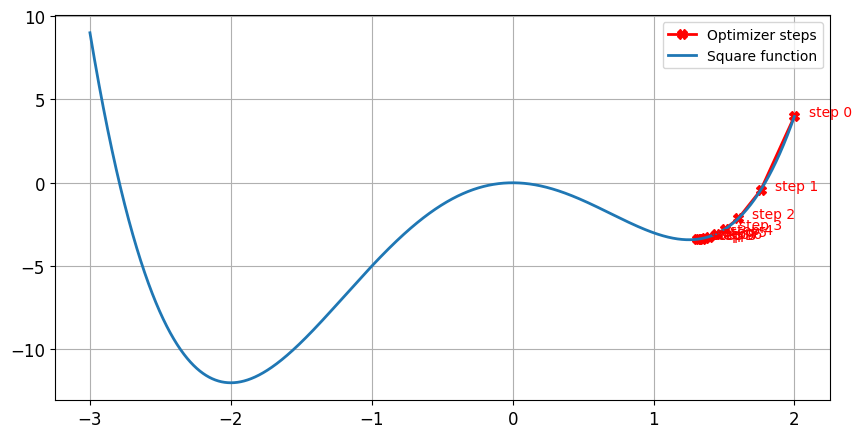

In [117]:
# Try a first value for momentum
mom0 = 0.1
optimize_and_plot(momentum=mom0)

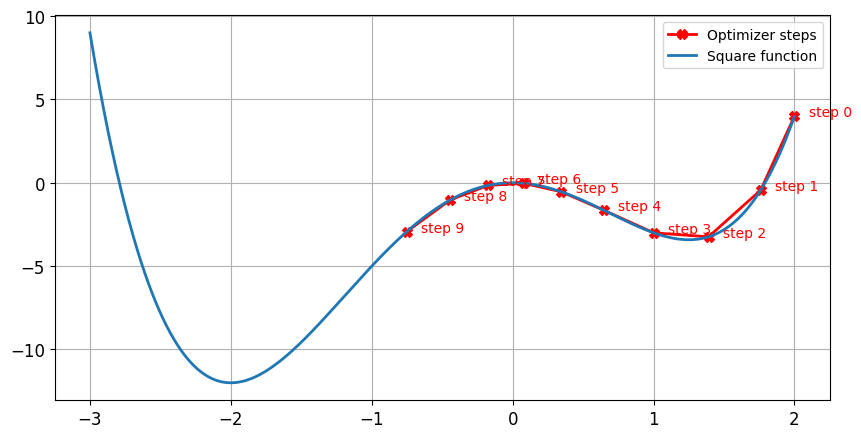

In [121]:
# Try a second value for momentum
mom1 = 0.98
optimize_and_plot(momentum=mom1)

## Chapter 4 - Evaluating and improving models

### Section 4.1 - Layer initialization and transfer learning

#### Freeze layers of a model
You are about to fine-tune a model on a new task after loading pre-trained weights. The model contains three linear layers. However, because your dataset is small, you only want to train the last linear layer of this model and freeze the first two linear layers.

The model has already been created and exists under the variable model. You will be using the named_parameters method of the model to list the parameters of the model. Each parameter is described by a name. This name is a string with the following naming convention: x.name where x is the index of the layer.

Remember that a linear layer has two parameters: the weight and the bias.

In [132]:
model = nn.Sequential(
    nn.Linear(8, 16),
    nn.Linear(16,32),
    nn.Linear(32, 10))

In [133]:
for name, param in model.named_parameters():    
  
    # Check if the parameters belong to the first layer
    if name == '0.weight':
      
        # Freeze the parameters
        param.requires_grad = False
  
    # Check if the parameters belong to the second layer
    if name == '1.weight':
      
        # Freeze the parameters
        param.requires_grad = False


In [134]:
for name, param in model.named_parameters():
    status = "Trainable" if param.requires_grad else "Frozen"
    print(f"{name}: {status}")

0.weight: Frozen
0.bias: Trainable
1.weight: Frozen
1.bias: Trainable
2.weight: Trainable
2.bias: Trainable


#### Layer initialization
The initialization of the weights of a neural network has been the focus of researchers for many years. When training a network, the method used to initialize the weights has a direct impact on the final performance of the network.

As a machine learning practitioner, you should be able to experiment with different initialization strategies. In this exercise, you are creating a small neural network made of two layers and you are deciding to initialize each layer's weights with the uniform method.

In [135]:
layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

# Use uniform initialization for layer0 and layer1 weights
nn.init.uniform_(layer0.weight)
nn.init.uniform_(layer1.weight)

model = nn.Sequential(layer0, layer1)

### Section 4.2 - Evaluating model performance

#### Writing the evaluation loop
In this exercise, you will write an evaluation loop to compute validation loss. The evaluation loop follows a similar structure to the training loop but without gradient calculations or weight updates.

`model`, `validationloader`, and loss function `criterion` have already been defined to handle predictions, data loading, and loss calculation.

**remark** - I made this a simple train and eval script

In [43]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Constants
NUM_EPOCHS = 200
LEARNING_RATE = 0.005  # reduced
MOMENTUM = 0.9

# Load data
df = pd.read_csv('water_potability.csv').dropna()  # optional: remove NaNs
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values  # Convert labels to int

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# DataLoaders
train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).long())
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test).long())
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model
model = nn.Sequential(
    nn.Linear(9, 30),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(30, 2),
    #nn.ReLU(),
    #nn.Dropout(p=0.5),
    #nn.Linear(15,2)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=0.0001)

# Training loop
for epoch in range(NUM_EPOCHS):
    # set model to train mode
    model.train()

    # initiate epoch loss
    train_epoch_loss = 0.0
    
    for features, labels in trainloader:
        optimizer.zero_grad()  # Reset gradients
        logits = model(features)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        train_epoch_loss += loss.item()
    print(f"EPOCH {epoch} - TRAIN LOSS: {train_epoch_loss / len(trainloader):.4f} ", end="")

    # turns off things lke dropout.
    model.eval()

    val_epoch_loss = 0
    with torch.no_grad():
        for features, labels in testloader:
            logits = model(features)
            loss = criterion(logits, labels)
            val_epoch_loss += loss.item()
    print(f"VALIDATION LOSS: {val_epoch_loss / len(testloader):.4f}")


EPOCH 0 - TRAIN LOSS: 0.7012 VALIDATION LOSS: 0.6883
EPOCH 1 - TRAIN LOSS: 0.6989 VALIDATION LOSS: 0.6796
EPOCH 2 - TRAIN LOSS: 0.6785 VALIDATION LOSS: 0.6774
EPOCH 3 - TRAIN LOSS: 0.6757 VALIDATION LOSS: 0.6765
EPOCH 4 - TRAIN LOSS: 0.6679 VALIDATION LOSS: 0.6737
EPOCH 5 - TRAIN LOSS: 0.6700 VALIDATION LOSS: 0.6723
EPOCH 6 - TRAIN LOSS: 0.6664 VALIDATION LOSS: 0.6719
EPOCH 7 - TRAIN LOSS: 0.6653 VALIDATION LOSS: 0.6705
EPOCH 8 - TRAIN LOSS: 0.6629 VALIDATION LOSS: 0.6682
EPOCH 9 - TRAIN LOSS: 0.6647 VALIDATION LOSS: 0.6673
EPOCH 10 - TRAIN LOSS: 0.6564 VALIDATION LOSS: 0.6664
EPOCH 11 - TRAIN LOSS: 0.6633 VALIDATION LOSS: 0.6649
EPOCH 12 - TRAIN LOSS: 0.6620 VALIDATION LOSS: 0.6644
EPOCH 13 - TRAIN LOSS: 0.6643 VALIDATION LOSS: 0.6628
EPOCH 14 - TRAIN LOSS: 0.6561 VALIDATION LOSS: 0.6630
EPOCH 15 - TRAIN LOSS: 0.6630 VALIDATION LOSS: 0.6636
EPOCH 16 - TRAIN LOSS: 0.6623 VALIDATION LOSS: 0.6615
EPOCH 17 - TRAIN LOSS: 0.6539 VALIDATION LOSS: 0.6601
EPOCH 18 - TRAIN LOSS: 0.6590 VALIDATI

#### Calculating accuracy using torchmetrics
Tracking accuracy during training helps identify the best-performing epoch.

In this exercise, you'll use `torchmetrics` to calculate accuracy on a facemask dataset with three classes. The `plot_errors` function will highlight misclassified samples, helping you analyze model errors.

`torchmetrics` package is already imported. Model `outputs` are softmax probabilities, and `labels` are one-hot encoded vectors.

In [44]:
import torchmetrics

# Create accuracy metric
metric = torchmetrics.Accuracy(task="multiclass", num_classes=2)
for features, labels in testloader:
    
    # output is shape (batch_size,2)
    outputs = model(features)
    
    # Calculate accuracy over the batch
    # labels is (batch_size) filled with 0 or 1
    metric.update(outputs, labels)
    
# Calculate accuracy over the whole epoch
accuracy = metric.compute()
print(f"Accuracy on all data: {accuracy}")

# Reset metric for the next epoch
metric.reset()
#plot_errors(model, dataloader)

Accuracy on all data: 0.6823821067810059


### Section 4.3 - Fighting overfitting

#### Experimenting with dropout

Dropout helps prevent overfitting by randomly setting some output values to zero during training. In this exercise, you'll build a simple neural network with dropout and observe how it behaves in training and evaluation modes.

`torch.nn` package is preloaded as `nn`, and `features` is already defined for you.

In [48]:
model = nn.Sequential(
    nn.Linear(9, 6),
    nn.Linear(6, 4),
    nn.Dropout(p=0.5))

model.train()
output_train = model(features)

# Forward pass in evaluation mode (Dropout disabled)
model.eval()
output_eval = model(features)

# Print results
print("Output in train mode:", output_train)
print("Output in eval mode:", output_eval)

Output in train mode: tensor([[-1.0575,  0.3678, -0.0442,  0.0000],
        [-0.4058,  0.0000,  0.0000,  1.1846],
        [-0.0000, -0.3238,  0.0468,  1.9877],
        [ 0.4842,  0.1343, -0.0000,  0.0000],
        [-0.0000, -0.0000,  0.4214,  0.0000],
        [ 0.5547, -0.0000, -0.0000,  1.3052],
        [-0.0000, -2.4787,  1.3322,  0.0000],
        [-0.0000, -0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  0.0000],
        [-0.3451, -0.0000,  1.3547,  1.8058],
        [-0.0000, -1.0029,  0.0000,  0.0000],
        [-0.5892, -0.0000,  1.6090,  0.0000],
        [-0.3559, -0.9414,  0.6365,  0.0000],
        [-0.0000, -0.0000,  0.0000,  0.0000],
        [-0.0000, -0.9332, -0.0000,  1.0375],
        [-1.0057, -0.8871,  0.0000,  0.0000],
        [-0.0352, -0.0000, -0.0000,  0.0000],
        [-0.0000, -0.0000,  0.8244,  0.0000],
        [-0.3632,  0.1114, -0.0000,  0.0000]], grad_fn=<MulBackward0>)
Output in eval mode: tensor([[-0.5288,  0.1839, -0.0221,  0.6331],
        [-0.

### Section 4.4 - Improving model performance

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperparameter_search(values):
    lrs, momentums = zip(*values)

    plt.figure(figsize=(8, 6))
    plt.scatter(lrs, momentums)
    plt.xscale("log")  # Use log scale for learning rate
    plt.xlabel("Learning Rate")
    plt.ylabel("Momentum")
    # plt.title("Randomly Sampled Learning Rates and Momentum")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Set specific tick marks on the x-axis
    plt.xticks([10**-2, 10**-3, 10**-4], 
               [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$'])

    plt.show()

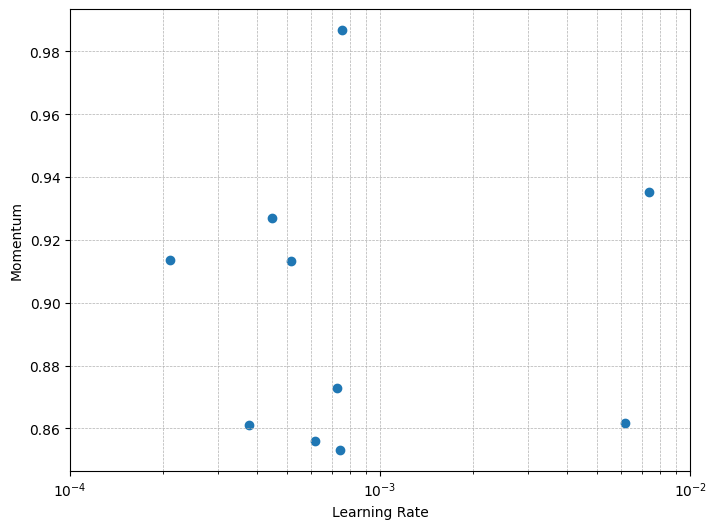

In [54]:
values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 2 and 4
    factor = np.random.uniform(2,4)
    lr = 10 ** -factor
    
    # Randomly select a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85, 0.99)
    
    values.append((lr, momentum))
       
plot_hyperparameter_search(values)